IMPORTS

In [1]:
import pandas as pd
import sklearn
import scipy
import sklearn.ensemble as forest
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import sklearn.gaussian_process as kriging
import seaborn as sns
from tensorflow import keras
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, TransformerMixin, FeatureUnion
from sklearn.preprocessing import *
from feature_engine import wrappers,outliers

# from feature_engine import
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.gaussian_process import GaussianProcessRegressor
from feature_engine.creation import MathFeatures, RelativeFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
import optuna
import json
import pickle

c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from tensorflow import keras
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.gaussian_process.kernels import RBF
from lightgbm import LGBMRegressor

In [3]:
def rna_model(
    features_in=84,
    hidden_layer_units=32,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.001,
    dropout=0.4,
):
    rna_model = keras.models.Sequential()
    rna_model.add(keras.layers.Input(shape=(features_in,)))
    rna_model.add(keras.layers.Dense(units=(features_in + 12), activation="relu"))
    rna_model.add(keras.layers.Dense(units=hidden_layer_units))

    rna_model.add(keras.layers.Dropout(rate=dropout))

    rna_model.add(keras.layers.LeakyReLU())
    rna_model.add(keras.layers.Dense(units=hidden_layer_units))

    rna_model.add(keras.layers.LeakyReLU())

    rna_model.add(keras.layers.Dropout(rate=dropout))
    rna_model.add(keras.layers.Dense(units=1, activation="linear"))

    rna_model.compile(
        loss="mean_squared_error",
        optimizer=optimizer(learning_rate=optimizer__learning_rate),
    )

    return rna_model


class Regressor:
    def __init__(self):
        # self.n_estimators=n_estimators-
        # self.features_in = len(x.columns)
        self.random_state = 5
        # self.models = self._define_model()
        # self.models_names = list(self._define_model().keys())
        # self.params_ = self._models_params()
        
        pass

    rfecv_features = {
        "RandomForestRegressor": [
            "ReactionTemperature",
            "H2FlowRate",
            "ReactionTemperature^2",
            "H2FlowRate^2",
            "ReactionTemperature^3",
            "ReactionTemperature^2 ReactorVolume",
            "H2FlowRate^2 FeedPressure",
        ],
        "GradientBoostingRegressor": [
            "ReactionTemperature",
            "ReactionTemperature^2",
            "H2FlowRate^2",
            "ReactionTemperature^3",
            "ReactionTemperature^2 ReactorVolume",
            "H2FlowRate^3",
            "H2FlowRate^2 FeedPressure",
        ],
        "XGBRFRegressor": [
            "ReactionTemperature",
            "H2FlowRate",
            "ReactionTemperature^2",
            "H2FlowRate^2",
            "ReactionTemperature^2 ReactorVolume",
            "H2FlowRate^2 ReactorVolume",
            "H2FlowRate^2 FeedPressure",
        ],
        "LGBMRegressor": [
            "ReactionTemperature",
            "H2FlowRate",
            "ReactionTemperature FeedPressure",
            "ReactionTemperature^2 ReactorVolume",
            "H2FlowRate^2 SplitsValues",
            "H2FlowRate ReactorVolume^2",
        ],
    }
    def fit(self,X:pd.DataFrame,y=None):
        self.x=X
        return self
    def search_params(self):
        search_params = {
            "RandomForestRegressor": {
                "n_estimators": 1000,
                "min_samples_split": 5,
                "min_samples_leaf": 4,
                "max_depth": None,
                "bootstrap": True,
            },
            "GradientBoostingRegressor": {
                "subsample": 1.0,
                "n_estimators": 200,
                "min_samples_split": 2,
                "min_samples_leaf": 1,
                "max_depth": 3,
                "learning_rate": 0.1,
            },
            "XGBRFRegressor": {
                "subsample": 1.0,
                "reg_lambda": 0.5,
                "reg_alpha": 0.1,
                "max_depth": 3,
                "learning_rate": 0.1,
                "gamma": 0,
                "colsample_bytree": 0.8,
            },
            "LGBMRegressor": {
                "subsample": 0.8,
                "num_leaves": 31,
                "n_estimators": 200,
                "min_child_samples": 50,
                "max_depth": 3,
                "learning_rate": 0.1,
                "colsample_bytree": 1.0,
            },
            "RNA": {
                "optimizer__learning_rate": 0.001,
                "optimizer": keras.optimizers.SGD,
                "hidden_layer_units": 64,
                "dropout": 0.4,
            },
        }
        return search_params
    
        



    def _models_params(self):
        param_dict = {
            "RandomForestRegressor": {
                "bootstrap": [True, False],
                "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                # 'max_features': ['1.0', 'sqrt'],
                "min_samples_leaf": [1, 2, 4],
                "min_samples_split": [2, 5, 10],
                "n_estimators": [
                    200,
                    400,
                    600,
                    800,
                    1000,
                    1200,
                    1400,
                ],
            },
            "GradientBoostingRegressor": {
                "n_estimators": [100, 200, 300],
                "learning_rate": [0.01, 0.1, 0.5],
                "max_depth": [3, 5, 7],
                "subsample": [0.8, 1.0],
                "min_samples_split": [2, 5],
                "min_samples_leaf": [1, 2],
                # 'max_features': ['sqrt', 'log2']
            },
            "XGBRFRegressor": {
                "learning_rate": [0.1, 0.01, 0.001],  # Learning rate
                "max_depth": [3, 4, 5],  # Maximum depth of each tree
                "subsample": [
                    0.8,
                    0.9,
                    1.0,
                ],  # Subsample ratio of the training instances
                "colsample_bytree": [
                    0.8,
                    0.9,
                    1.0,
                ],  # Subsample ratio of columns when constructing each tree
                "reg_alpha": [0, 0.1, 0.5],  # L1 regularization term on weights
                "reg_lambda": [0, 0.1, 0.5],  # L2 regularization term on weights
                "gamma": [
                    0,
                    0.1,
                    0.5,
                ],  # Minimum loss reduction required to make a further partition on a leaf node
            },
            "LGBMRegressor": {
                "n_estimators": [100, 200, 300],  # Number of boosting rounds
                "learning_rate": [0.01, 0.05, 0.1],  # Step size shrinkage
                "max_depth": [
                    3,
                    5,
                    7,
                    -1,
                ],  # Maximum depth of trees (-1 means no limit)
                "num_leaves": [31, 50, 100],  # Maximum number of leaves in one tree
                "min_child_samples": [
                    20,
                    50,
                    100,
                ],  # Minimum number of data points in leaves
                "subsample": [0.8, 1.0],  # Row subsampling rate
                "colsample_bytree": [0.8, 1.0],  # Feature subsampling rate
            },
            "RNA": {
                "hidden_layer_units": [32, 64, 128, 256],
                "optimizer": [
                    keras.optimizers.Adam,
                    keras.optimizers.SGD,
                    keras.optimizers.RMSprop,
                ],
                "optimizer__learning_rate": [0.1, 0.01, 0.001, 0.0001],
                "dropout": [0.1, 0.2, 0.3, 0.4, 0.5],
            },
        }

        # return [random_forest_params,gradient_boosting_regressor_params,ada_boost_regressor_params,gaussian_process_paramns,svr_params,xgb_regressor_params]
        return param_dict

    
    
    def _define_model(self):
        models = {
            "RandomForestRegressor": RandomForestRegressor,
            "GradientBoostingRegressor": GradientBoostingRegressor,
            "XGBRFRegressor": XGBRegressor,
            "LGBMRegressor": LGBMRegressor,
            "RNA": KerasRegressor(build_fn=rna_model,**{'hidden_layer_units':32,'optimizer':keras.optimizers.SGD,'optimizer__learning_rate':0.05,'dropout':0.4}),
        }

        return models

In [4]:
rscv=pd.DataFrame(Regressor()._models_params())
rscv.to_excel(excel_writer=f'rscv_param.xlsx')

Classes

In [5]:
class ColumnExtractor(TransformerMixin):
    def __init__(self,cols):
        self.cols=cols

    def transform(self,X:pd.DataFrame,y=None):
        self.x=X[self.cols]
        return self.x

    def fit(self,X,y=None):
        self.x=X
        return self
    
    # def inverse_transform(self):
        




Tratamento Dos Dados

In [6]:
dfx = pd.DataFrame(
    pd.read_csv(
        filepath_or_buffer="DadosMetamodelagemX4.csv",
        delimiter=",",
        index_col=False,
        names=[
            "ReactionTemperature",
            "H2FlowRate",
            "SplitsValues",
            "RefluxRatio",
            "ReactorVolume",
            "FeedPressure",
            "NANx",
        ],
    )
)
dfy = pd.DataFrame(
    pd.read_csv(
        "DadosMetamodelagemY4.csv",
        delimiter=",",
        names=[
            "ISBL",
            "CustoMateriaPrima",
            "CustoUtilidades",
            "Methanol",
            "IsValid",
            "IsConverged",
            "StreamConvergeance",
            "NANy",
        ],
    )
)
dfy["Methanol"] = dfy["Methanol"] * 32 * 575 / 1000


dft = pd.DataFrame.join(dfx, dfy)
dft.drop(dft.loc[dft["StreamConvergeance"] == False].index, inplace=True)
dft.drop(
    columns=["NANx", "NANy", "IsValid", "StreamConvergeance", "IsConverged"],
    inplace=True,
)
dft.reset_index(inplace=True, drop=True)
dft.astype(dtype=float, copy=True)
dft["ISBL"] = dft["ISBL"].astype(float)

df_isbl = dft["ISBL"]
df_osbl = df_isbl * 0.35
df_opex = (dft["CustoMateriaPrima"] + dft["CustoUtilidades"])*24*30*12
df_capex = (
    (
        df_isbl
        + df_osbl
        + 0.20 * (df_osbl + df_isbl)
        + 0.30 * (df_osbl + df_isbl)
        + 0.15 * (df_osbl + df_isbl)
    )
    
)
df_tac=(df_capex*0.20 + df_opex)/24/30/12
df_profit = pd.DataFrame(dft["Methanol"] - df_tac, columns=["Profit"])

to_drop = ["ISBL", "CustoMateriaPrima", "CustoUtilidades", "Methanol"]
dft.drop(labels=to_drop, inplace=True, axis=1)
dft = dft.join(df_profit)

target = ["Profit"]
features = [
    "ReactionTemperature",
    "H2FlowRate",
    "SplitsValues",
    "RefluxRatio",
    "ReactorVolume",
    "FeedPressure",
]

# dft.drop(dft[(dft[target]<-100000).values].index,axis=0,inplace=True)
# dft.reset_index(inplace=True,drop=True)

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    dft[features], dft[target], test_size=0.33
)
train_test_data_list = [x_train, x_test, y_train, y_test]
for i in train_test_data_list:
    i.reset_index(inplace=True, drop=True)
df_train = x_train.join(y_train)
df_test = x_test.join(y_test)



HeatMap Das Correlações

<Axes: >

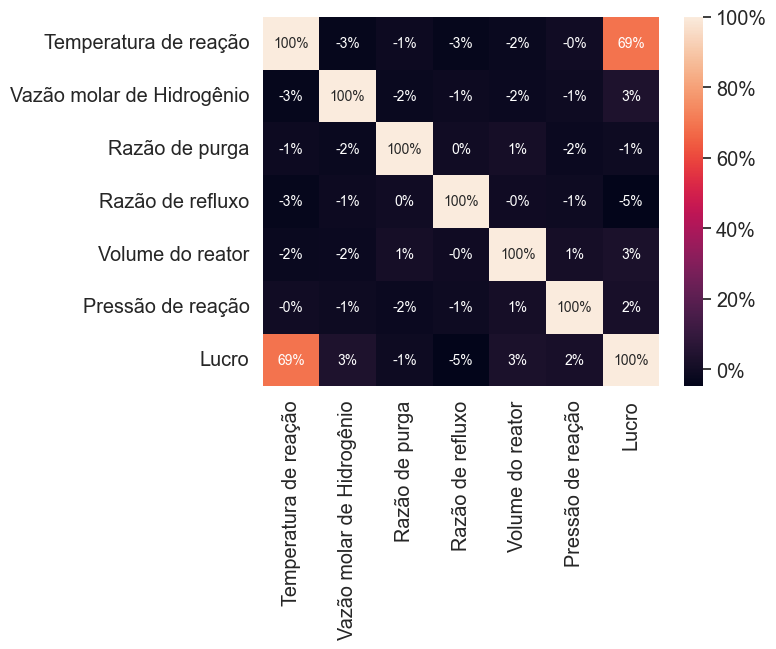

In [7]:
import locale
locale.setlocale(locale.LC_NUMERIC,'german')
sns.set(font_scale=1.3)
plt.rcParams['axes.formatter.use_locale'] = True
sns.heatmap(dft.set_axis(['Temperatura de reação','Vazão molar de Hidrogênio','Razão de purga','Razão de refluxo','Volume do reator','Pressão de reação','Lucro'],axis=1).corr()*100,annot=dft.corr(),fmt='.0%', annot_kws={"size": "10"},cbar_kws={'format': '%.0f%%'})

In [8]:
dft.set_axis(['Temperatura de reação','Vazão molar de Hidrogênio','Razão de purga','Razão de refluxo','Volume do reator','Pressão de reação','Lucro'],axis=1)

,Temperatura de reação,Vazão molar de Hidrogênio,Razão de purga,Razão de refluxo,Volume do reator,Pressão de reação,Lucro
0,235.305761,5921.789427,0.022338,1.448008,39.012662,4521.225348,-18346.808845
1,234.281864,5173.749285,0.040670,1.763083,54.255559,4952.407620,-20454.762069
2,223.687546,5872.471989,0.046077,1.643402,54.746195,4847.007118,-13083.614128
3,183.229275,6492.766259,0.004021,1.520655,52.143101,4984.276406,-101874.202094
4,223.526256,5808.926300,0.043433,1.665808,38.842025,5019.336672,-10250.495992
...,...,...,...,...,...,...,...
4012,214.014250,6082.841721,0.014288,1.403862,51.035600,5257.941319,-6511.423905
4013,223.503919,4916.512870,0.046002,1.339795,36.318093,4670.007726,-20520.017635
4014,203.827997,6293.653414,0.026883,1.362148,36.511497,4532.377097,-6442.430093
4015,217.051747,4840.822174,0.035123,1.614653,51.625125,5435.672490,-17181.156864


In [9]:
dft.corr().replace(".",",",regex=False,)


,ReactionTemperature,H2FlowRate,SplitsValues,RefluxRatio,ReactorVolume,FeedPressure,Profit
ReactionTemperature,1.000000,-0.032819,-0.011139,-0.033338,-0.019974,-0.002056,0.689472
H2FlowRate,-0.032819,1.000000,-0.019597,-0.011303,-0.019271,-0.009140,0.034627
SplitsValues,-0.011139,-0.019597,1.000000,0.000744,0.011124,-0.017451,-0.010354
RefluxRatio,-0.033338,-0.011303,0.000744,1.000000,-0.003880,-0.007390,-0.047948
ReactorVolume,-0.019974,-0.019271,0.011124,-0.003880,1.000000,0.012585,0.029798
FeedPressure,-0.002056,-0.009140,-0.017451,-0.007390,0.012585,1.000000,0.018026
Profit,0.689472,0.034627,-0.010354,-0.047948,0.029798,0.018026,1.000000


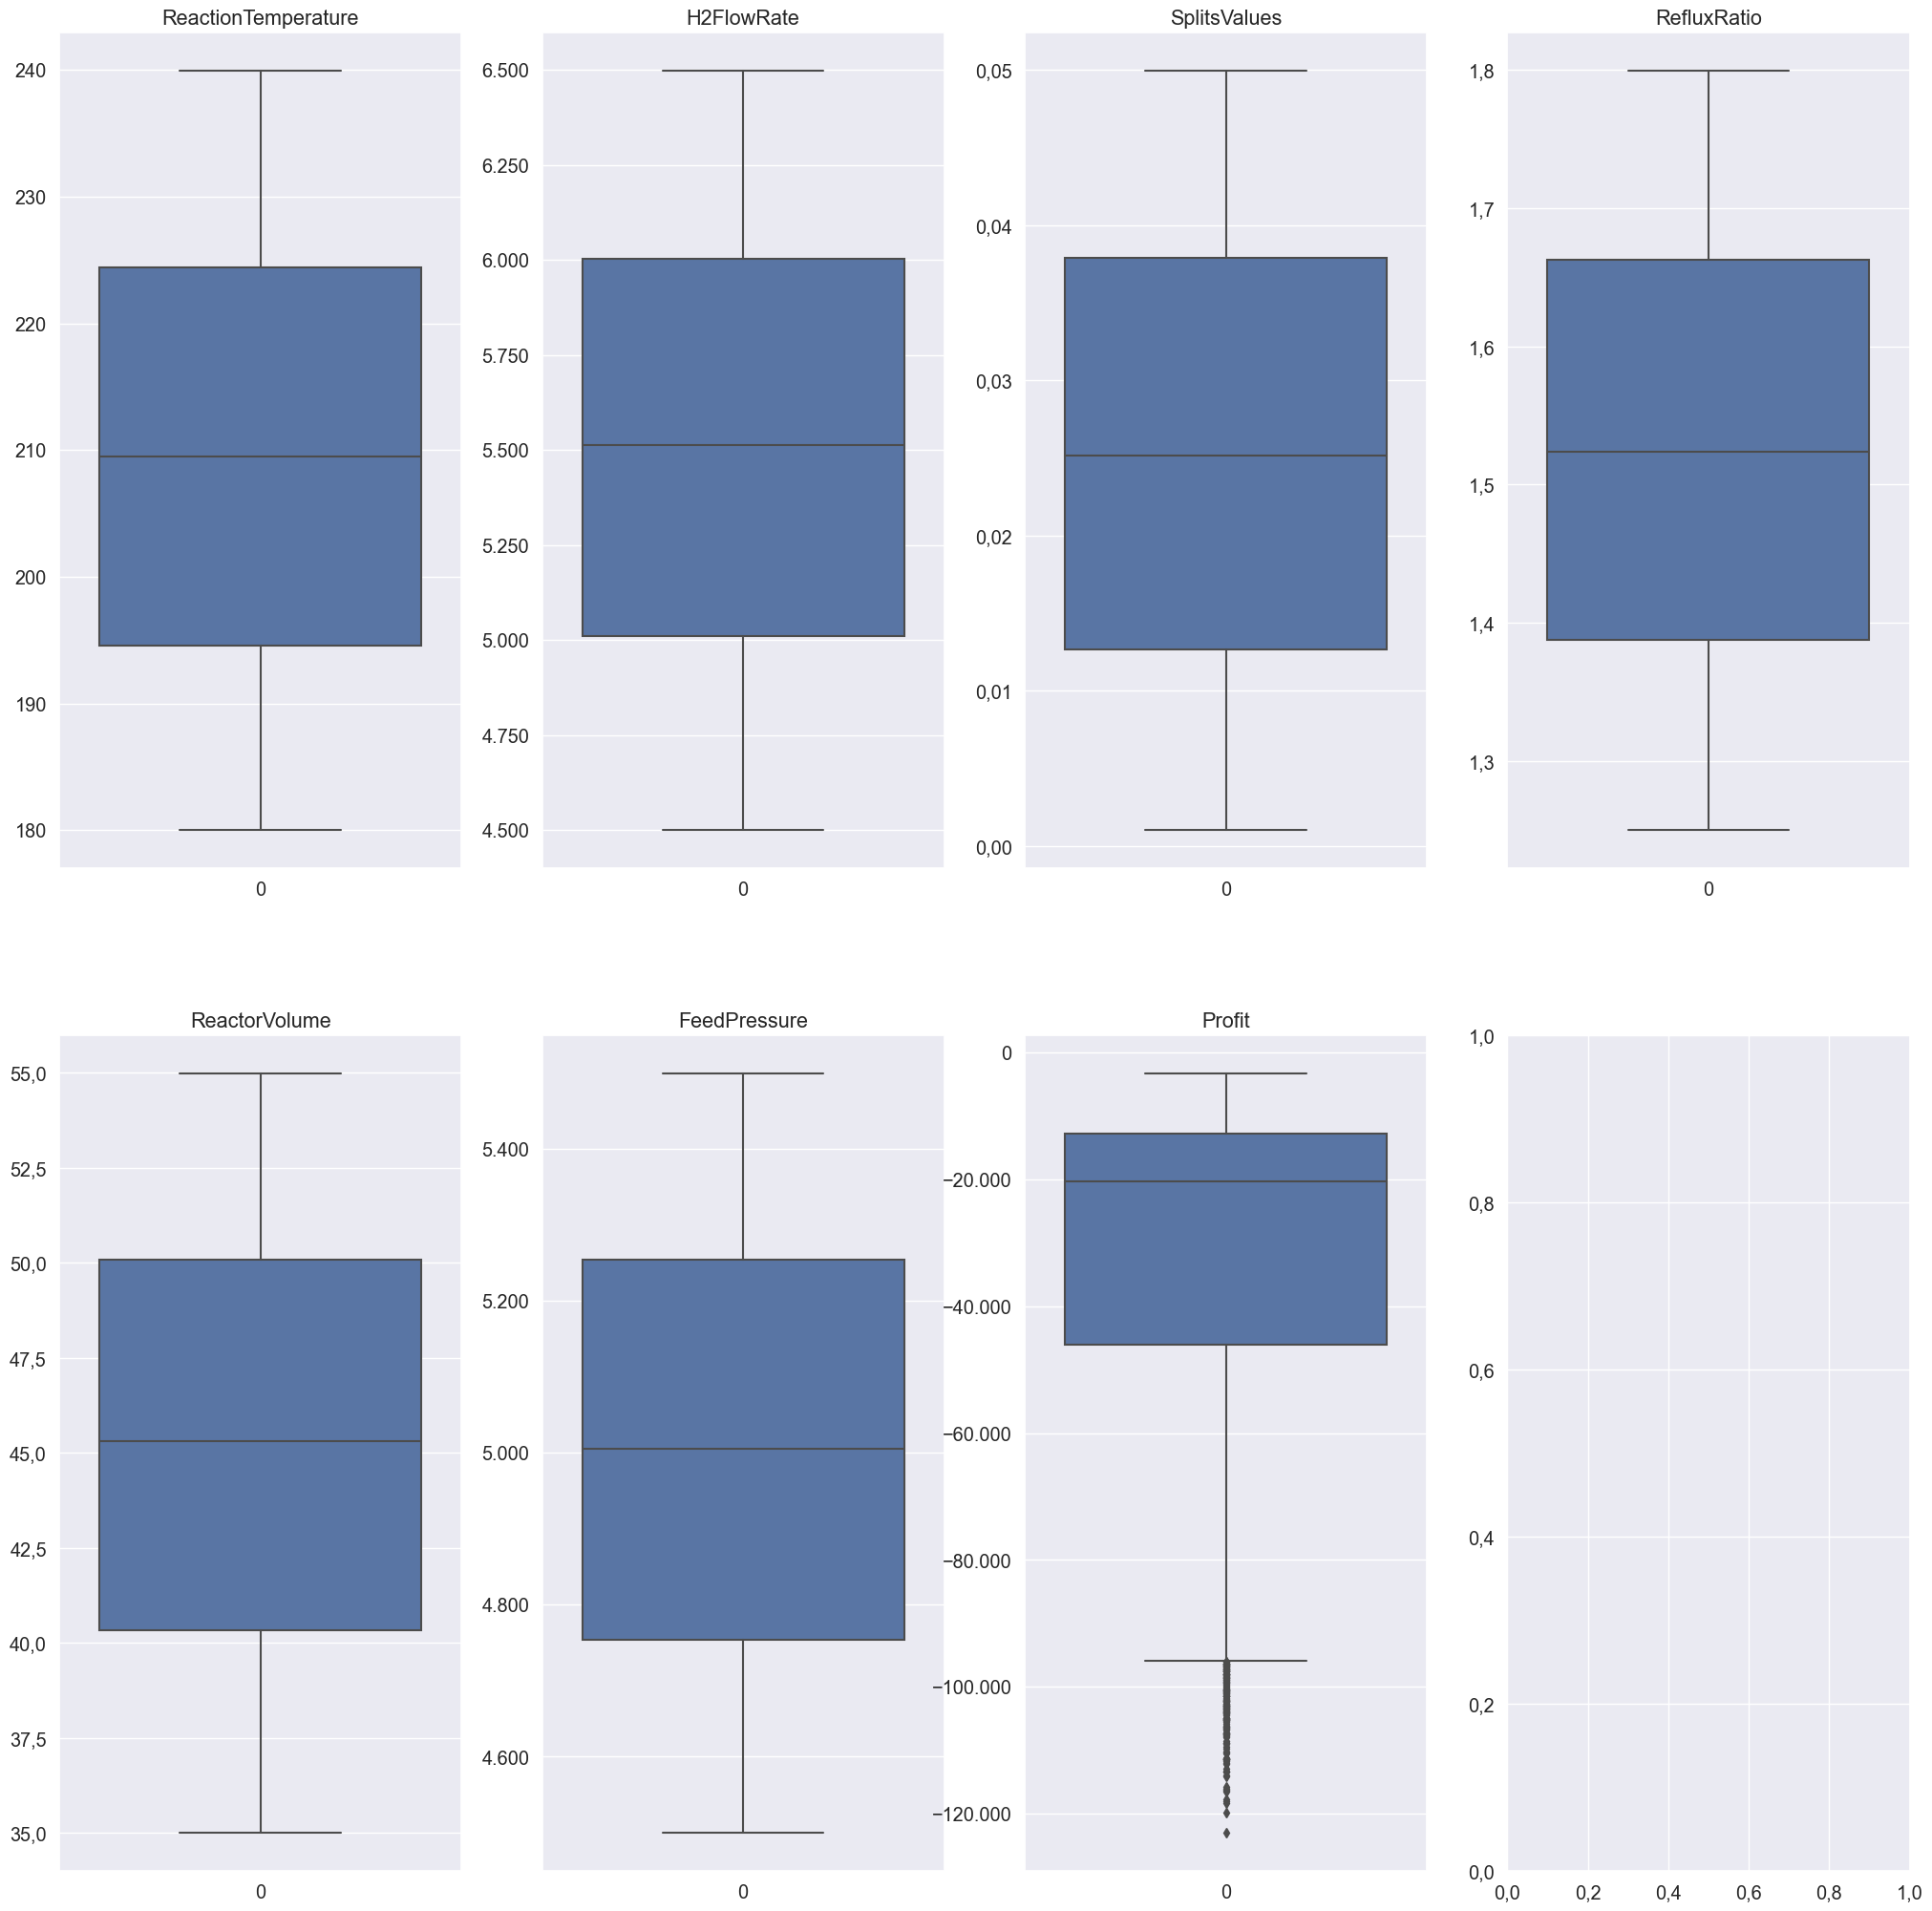

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(25, 25))
axesf = axes.flatten()
for i, columns in enumerate(dft.columns.to_list()):
    ax = axesf[i]
    ax.set_title(columns)
    sns.boxplot(df_train[columns], ax=ax,)

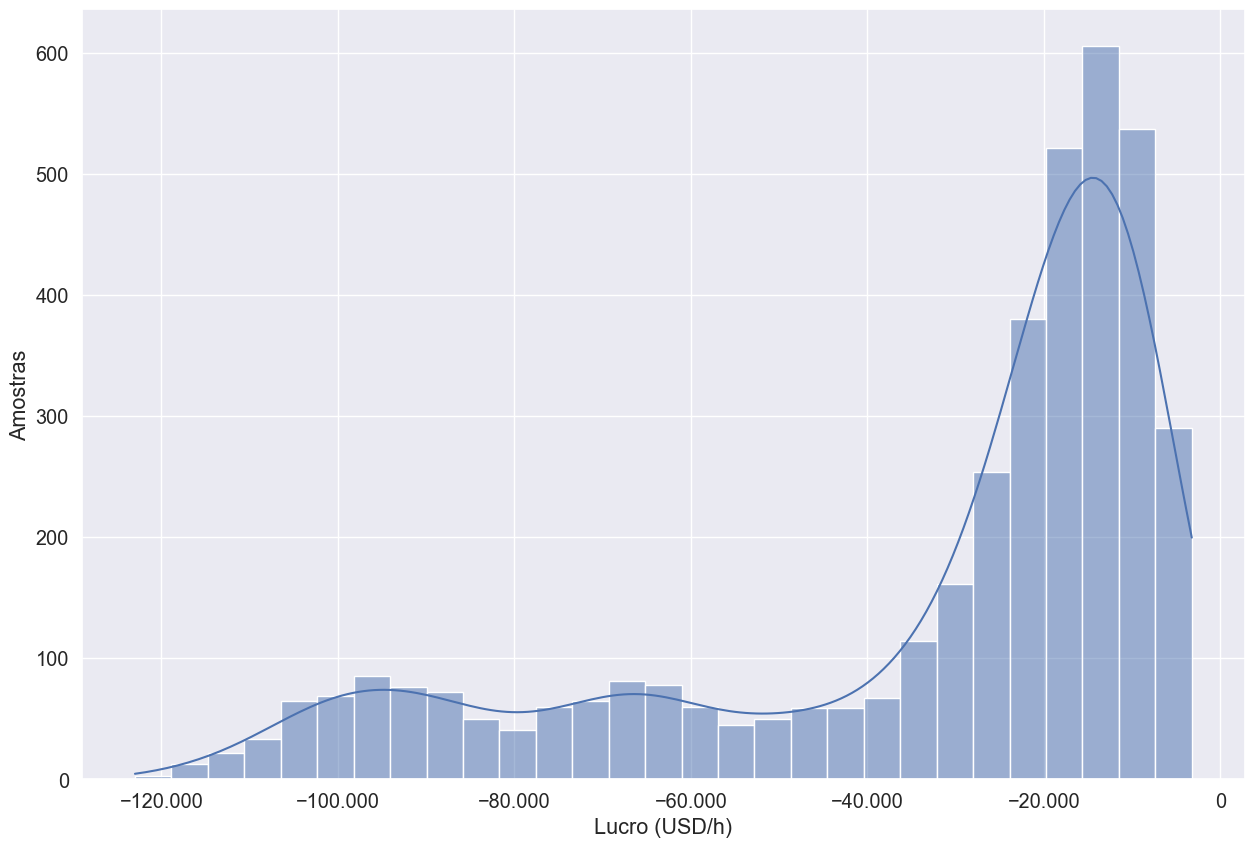

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))
sns.histplot(dft['Profit'], ax=axes,kde=True)
axes.set_ylabel('Amostras')
axes.set_xlabel('Lucro (USD/h)')
sns.set(font_scale=1.8)

In [12]:
with open('models_parameters.json','r') as mp:
    models_parameters=dict(json.load(mp))

Data engineering e análise dos modelos

In [13]:
# x_train_trans = x_train
# x_test_trans = x_test
# y_train_trans = y_train
# y_test_trans = y_test


# # target_transformer = Pipeline([
# #     # ("BoxCox", preprocessing.PowerTransformer(method="box-cox", copy=False)),
# #     ("target_transformer", RobustScaler())
# #     ])

# # target_transformer.set_output(transform="pandas")
# # y_train_trans = target_transformer.fit_transform(y_train_trans)
# # y_test_trans = target_transformer.transform(y_test_trans)

# feature_trans = Pipeline(
#     [
#         # ("PolynomialFeatures", PolynomialFeatures(3)),
#         ("LOG", FunctionTransformer(func=np.log)),
#         ("StandardScaler", StandardScaler()),
        
#     ]

# )
# feature_trans.set_output(transform="pandas")
# x_train_trans = feature_trans.fit_transform(x_train_trans)
# x_test_trans = feature_trans.transform(x_test_trans)
# rs=Regressor().fit(x_train_trans)
# models = rs._define_model()
# parameters = rs._models_params()
# best_params = {}
# scores = {}
# models_list = {}
# scoring={'r2':metrics.make_scorer(metrics.r2_score),'neg_mean_squared_error':metrics.make_scorer(metrics.mean_squared_error)}

# for name, model in models.items():
#     if name =='RNA':
#         gs = model_selection.cross_validate(
#             estimator=model(build_fn=rna_model,**{'features_in':len(x_train_trans.columns)},**models_parameters[name]),
#             X=x_train_trans,
#             y=np.ravel(y_train),
#             cv=3,
#             scoring=scoring,
#             verbose=0,)
#     else:
#         gs = model_selection.cross_validate(
#             estimator=model(**models_parameters[name]),
#             X=x_train_trans,
#             y=np.ravel(y_train),
#             cv=3,
#             scoring=scoring,
#             verbose=0,)
#     scores.update({name: gs["test_r2"]})
#     models_list.update({name: gs})
#     print("Modelo:{}\n score: {}".format(*[name, scores[name]]))

# print(scores)

In [14]:
# pd.DataFrame(scores).to_json(r'cv_scores.json')

RandomizedSearchCv 

In [15]:
x_train_trans = x_train
x_test_trans = x_test
y_train_trans = y_train
y_test_trans = y_test


target_transformer = Pipeline([
        ("target_transformer", RobustScaler()),
        
        # ("BoxCox", preprocessing.PowerTransformer(method="box-cox", copy=False)),
    ]
)
target_transformer.set_output(transform="pandas")
y_train_trans = target_transformer.fit_transform(y_train_trans)
y_test_trans = target_transformer.transform(y_test_trans)

feature_trans = Pipeline(
    [
        ("PolynomialFeatures", PolynomialFeatures(3, interaction_only=False)),
        
        # ("LOG", FunctionTransformer(func=np.log)),
        ("StandardScaler", StandardScaler()),
    ]
)
feature_trans.set_output(transform="pandas")
x_train_trans = feature_trans.fit_transform(x_train_trans)
x_test_trans = feature_trans.transform(x_test_trans)

regressor = Regressor()
models=Regressor()._define_model()
parameters = regressor._models_params()
best_params = {}
scores = {}
models_list = {}
# scoring={'r2':metrics.make_scorer(metrics.r2_score),'neg_mean_squared_error':metrics.make_scorer(metrics.mean_squared_error)}

for name, model in models.items():
    if name == 'RNA':
        
        gs = RandomizedSearchCV(
            estimator=model,
            param_distributions=parameters[name],
            cv=3,
            scoring='r2',
            verbose=2)
        gs.fit(x_train_trans,np.ravel(y_train_trans))
        scores.update({name:gs.best_score_})
        models_list.update({name:gs})
        best_params.update({name:gs.best_params_})
        print("Modelo:{}\n score: {}".format(*[name, scores[name]]))

pd.DataFrame(best_params).to_excel(excel_writer=f'rna_rscv_best_params.xlsx')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.1, hidden_layer_units=256, optimizer=<class 'keras.optimizers.sgd.SGD'>, optimizer__learning_rate=0.0001; total time=   1.3s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.1, hidden_layer_units=256, optimizer=<class 'keras.optimizers.sgd.SGD'>, optimizer__learning_rate=0.0001; total time=   0.8s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.1, hidden_layer_units=256, optimizer=<class 'keras.optimizers.sgd.SGD'>, optimizer__learning_rate=0.0001; total time=   0.9s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.5, hidden_layer_units=256, optimizer=<class 'keras.optimizers.adam.Adam'>, optimizer__learning_rate=0.001; total time=   0.8s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.5, hidden_layer_units=256, optimizer=<class 'keras.optimizers.adam.Adam'>, optimizer__learning_rate=0.001; total time=   0.9s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.5, hidden_layer_units=256, optimizer=<class 'keras.optimizers.adam.Adam'>, optimizer__learning_rate=0.001; total time=   0.9s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.3, hidden_layer_units=128, optimizer=<class 'keras.optimizers.sgd.SGD'>, optimizer__learning_rate=0.001; total time=   0.8s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.3, hidden_layer_units=128, optimizer=<class 'keras.optimizers.sgd.SGD'>, optimizer__learning_rate=0.001; total time=   0.8s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.3, hidden_layer_units=128, optimizer=<class 'keras.optimizers.sgd.SGD'>, optimizer__learning_rate=0.001; total time=   1.1s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.5, hidden_layer_units=128, optimizer=<class 'keras.optimizers.adam.Adam'>, optimizer__learning_rate=0.001; total time=   0.8s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.5, hidden_layer_units=128, optimizer=<class 'keras.optimizers.adam.Adam'>, optimizer__learning_rate=0.001; total time=   0.8s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


29/29 [==============================] - 0s 1ms/step
[CV] END dropout=0.5, hidden_layer_units=128, optimizer=<class 'keras.optimizers.adam.Adam'>, optimizer__learning_rate=0.001; total time=   0.8s


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KeyboardInterrupt: 

In [ ]:
with open(f'models_parameters.json',mode='r') as file:
    models__params=json.load(file)

In [ ]:
pd.DataFrame(models__params).to_excel(excel_writer=f'optuna_params.xlsx')

In [ ]:
pd.DataFrame(best_params).to_excel(excel_writer=f'rscv_best_params.xlsx')

RFECV features_to_drop

In [ ]:
# x_train_trans = x_train
# x_test_trans = x_test
# y_train_trans = y_train
# y_test_trans = y_test


# target_transformer = Pipeline(
#     [
#         ("target_transformer", RobustScaler()),
#         # ("BoxCox", preprocessing.PowerTransformer(method="box-cox", copy=False)),
#     ]
# )
# target_transformer.set_output(transform="pandas")
# y_train_trans = target_transformer.fit_transform(y_train_trans)
# y_test_trans = target_transformer.transform(y_test_trans)
# rs=Regressor()
# # model = Pipeline(
# #     [
# #         ("PolynomialFeatures", PolynomialFeatures(3, interaction_only=False)),
        
# #         # ("LOG", FunctionTransformer(func=np.log)),
# #         ("StandardScaler", StandardScaler()),
# #         ('Regressor_fit',rs),
# #         ('model',rs._define_model()['RNA'])
    
# #     ]
# # )

# # features_to_drop={}
# # mod=model.fit(x_train_trans,y_train_trans)
# # mod
# # # gs=RFECV(model,cv=3, scoring='r2',)
# # # gs.fit(x_train_trans,np.ravel(y_train_trans))
# # # features_to_drop.update({name:gs.support_})

Optuna Parameter optimization

In [ ]:
# x_train_trans = x_train
# x_test_trans = x_test
# y_train_trans = y_train
# y_test_trans = y_test


# target_transformer = Pipeline(
#     [
#         ("target_transformer", RobustScaler()),
#         # ("BoxCox", preprocessing.PowerTransformer(method="box-cox", copy=False)),
#     ]
# )
# target_transformer.set_output(transform="pandas")
# y_train_trans = target_transformer.fit_transform(y_train_trans)
# y_test_trans = target_transformer.transform(y_test_trans)

# models=Regressor()._define_model()
# selected_features=Regressor().rfecv_features
# feature_trans = Pipeline(
#     [
#         ("PolynomialFeatures", PolynomialFeatures(3, interaction_only=False)),
#         # ('ColumnExtractor',ColumnExtractor(selected_features[name])),
#         # ("LOG", FunctionTransformer(func=np.log)),
#         ("StandardScaler", StandardScaler()),
#         # ('model',models[name])

#     ]
# )   
# feature_trans.set_output(transform='pandas')
# x_train_trans = feature_trans.fit_transform(x_train_trans)
# x_test_trans = feature_trans.transform(x_test_trans)

# optuna_param_dist={"RandomForestRegressor": {
#             "n_estimators": optuna.distributions.IntDistribution(800,1200),
#             "min_samples_split":  optuna.distributions.IntDistribution(3,8),
#             "min_samples_leaf": optuna.distributions.IntDistribution(2,6),
           
#         },
#         "GradientBoostingRegressor": {
#             "subsample":  optuna.distributions.FloatDistribution(0.2,0.8),
#             "n_estimators":  optuna.distributions.IntDistribution(150,250),
#             "min_samples_split":  optuna.distributions.IntDistribution(2,8),
#             "min_samples_leaf": optuna.distributions.IntDistribution(2,8),
#             "max_depth": optuna.distributions.IntDistribution(2,8),
#             "learning_rate": optuna.distributions.FloatDistribution(0.01,0.5),
#         },
#         "XGBRFRegressor": {
#             "subsample": optuna.distributions.FloatDistribution(0.2,0.8),
#             "reg_lambda": optuna.distributions.FloatDistribution(0.2,0.7),
#             "reg_alpha": optuna.distributions.FloatDistribution(0.08,0.5),
#             "max_depth": optuna.distributions.IntDistribution(2,8),
#             "learning_rate": optuna.distributions.FloatDistribution(0.01,0.5),
#             "gamma": optuna.distributions.IntDistribution(1,3),
#             "colsample_bytree": optuna.distributions.FloatDistribution(0.2,0.8),
#         },
#         "LGBMRegressor": {
#             "subsample": optuna.distributions.FloatDistribution(0.2,0.8),
#             "num_leaves": optuna.distributions.IntDistribution(25,35),
#             "n_estimators": optuna.distributions.IntDistribution(150,250),
#             "min_child_samples": optuna.distributions.IntDistribution(35,60),
#             "max_depth": optuna.distributions.IntDistribution(2,10),
#             "learning_rate": optuna.distributions.FloatDistribution(0.01,0.5),
#             "colsample_bytree":optuna.distributions.FloatDistribution(0.2,0.8),
#         },
#         "RNA": {
#             "optimizer__learning_rate": optuna.distributions.FloatDistribution(0.0001,0.01),
#             # "optimizer": keras.optimizers.SGD,
#             "hidden_layer_units": optuna.distributions.IntDistribution(32,80),
#             "dropout": optuna.distributions.FloatDistribution(0.2,0.6),
#         },
#     }

# optuna_scores={}
# optuna_params={}
# for name,model in Regressor()._define_model().items():
#     if name=='RNA':
#         # x_train_trans_selected_features=x_train_trans[Regressor.rfecv_features[name]]
#         optuna_search=optuna.integration.OptunaSearchCV(estimator=model,param_distributions=optuna_param_dist[name],cv=5,verbose=2,scoring='r2')
#         optuna_search.fit(x_train_trans,np.ravel(y_train_trans))
#         trial=optuna_search.study_.best_trial
#         params=optuna_search.study_.best_params
#         print('best trial:{} '.format(trial))
#         optuna_scores.update({name:trial})
#         optuna_params.update({name:params})
#     else:
#         None
    



Perpetuação dos modelos

In [ ]:
# with open('models_features_selected.json','r') as fs:
#     features_selected=dict(json.load(fs))
# with open('models_parameters.json','r') as mp:
#     models_parameters=dict(json.load(mp))

# model_dict={}

# feature_transformer_dict={}



# for name,model in Regressor()._define_model().items():
      
#     if name!='RNA':
#         model_pipeline=Pipeline([
#                         ('Polinomial_features',PolynomialFeatures(3)),
#                         ('StandardScaler',StandardScaler()),
#                         # ('features_selected',ColumnExtractor(cols=features_selected[name])),
#                         ('model',model(**models_parameters[name]))
#                         ])
#         # xt=feature_pipeline.fit_transform(x_train,y_train_t)
#         model_pipeline.fit(x_train,np.ravel(y_train))
#     else:
#         model_pipeline=Pipeline([
#                         ('Polinomial_features',PolynomialFeatures(3)),
#                         ('StandardScaler',StandardScaler()),
#                         # ('features_selected',ColumnExtractor(features_selected[name])),
#                         ('model',model(build_fn=rna_model,**models_parameters[name],**{'features_in':84}))
#                         ])
#         # feature_pipeline.named_steps['Polinomial_features'].set_output(transform='pandas')
#         # feature_pipeline.named_steps['StandardScaler'].set_output(transform='pandas')
#         model_pipeline.fit(x_train,np.ravel(y_train))
    
#     model_dict.update({name:model_pipeline})
#     # target_transformer_dict.update({name:target_transformer})
# with open("models.pkl", 'wb') as file:
    
#     pickle.dump(model_dict,file)


Learning Curve

In [ ]:
learning_curves={}
with open('models.pkl', 'rb') as file:
    models_dict=pickle.load(file)
for name,models in models_dict.items():
    learning_curves.update({name:model_selection.learning_curve(models,x_train,y_train,train_sizes=[.2,.4,.6,.8,1],)})
with open (r'learning_curves_dict.pickle','wb') as file:
    pickle.dump(learning_curves,file)

c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


KeyboardInterrupt: 

In [ ]:
with open (r'learning_curves_dict.pickle','rb') as file:
    lc=pickle.load(file)

In [ ]:
test_data_lc_data={}
for model_name, lc_dict in lc.items():
    train_size,train_data,test_data=lc_dict
    test_data_lc_data.update({model_name:test_data})

        # test_data_lc_data[name][j]=i.mean()
test_data_lc_data_mean=[]
for name,value in test_data_lc_data.items():
    for i in value:
       test_data_lc_data_mean.append(i.mean())
test_data_lc_mean=np.array(test_data_lc_data_mean).reshape(-1,5)
test_data_lc_mean

array([[0.91583579, 0.92346761, 0.92667821, 0.92757523, 0.929409  ],
       [0.91402257, 0.92258334, 0.92701534, 0.92734018, 0.92770533],
       [0.90046735, 0.9109499 , 0.91247234, 0.91519383, 0.92002074],
       [0.91094849, 0.91922195, 0.92500742, 0.92589654, 0.92759796],
       [0.87735644, 0.91185937, 0.91586064, 0.91932588, 0.91559933]])

In [ ]:
porpo={}

for name,data in test_data_lc_data.items():
    l=[]    
    for i in range(len(data)):
        l.append(test_data_lc_data[name][i].mean())    
    porpo.update({name:l})

In [ ]:
learning_curve_df=pd.DataFrame(porpo,index=data_samples)

In [ ]:
data_samples=lc['RandomForestRegressor'][0]

In [ ]:
co=list(learning_curve_df.columns)

In [ ]:

learning_curve_df.to_excel('learning_curve_excel.xlsx')

In [ ]:
list(learning_curve_df.columns)

['RandomForestRegressor',
 'GradientBoostingRegressor',
 'XGBRFRegressor',
 'LGBMRegressor',
 'RNA']

In [ ]:
res=lambda x: test_data_lc_data['RandomForestRegressor'][x].mean()
res

<function __main__.<lambda>(x)>

In [ ]:
test_data_lc_data

{'RandomForestRegressor': array([[0.91583579, 0.91583579, 0.91583579, 0.91583579, 0.91583579],
        [0.92346761, 0.92346761, 0.92346761, 0.92346761, 0.92346761],
        [0.92667821, 0.92667821, 0.92667821, 0.92667821, 0.92667821],
        [0.92757523, 0.92757523, 0.92757523, 0.92757523, 0.92757523],
        [0.929409  , 0.929409  , 0.929409  , 0.929409  , 0.929409  ]]),
 'GradientBoostingRegressor': array([[0.91402257, 0.91402257, 0.91402257, 0.91402257, 0.91402257],
        [0.92258334, 0.92258334, 0.92258334, 0.92258334, 0.92258334],
        [0.92701534, 0.92701534, 0.92701534, 0.92701534, 0.92701534],
        [0.92734018, 0.92734018, 0.92734018, 0.92734018, 0.92734018],
        [0.92770533, 0.92770533, 0.92770533, 0.92770533, 0.92770533]]),
 'XGBRFRegressor': array([[0.90046735, 0.90046735, 0.90046735, 0.90046735, 0.90046735],
        [0.9109499 , 0.9109499 , 0.9109499 , 0.9109499 , 0.9109499 ],
        [0.91247234, 0.91247234, 0.91247234, 0.91247234, 0.91247234],
        [0.915

In [ ]:
test_data_lc_data

{'RandomForestRegressor': array([[0.91583579, 0.91583579, 0.91583579, 0.91583579, 0.91583579],
        [0.92346761, 0.92346761, 0.92346761, 0.92346761, 0.92346761],
        [0.92667821, 0.92667821, 0.92667821, 0.92667821, 0.92667821],
        [0.92757523, 0.92757523, 0.92757523, 0.92757523, 0.92757523],
        [0.929409  , 0.929409  , 0.929409  , 0.929409  , 0.929409  ]]),
 'GradientBoostingRegressor': array([[0.91402257, 0.91402257, 0.91402257, 0.91402257, 0.91402257],
        [0.92258334, 0.92258334, 0.92258334, 0.92258334, 0.92258334],
        [0.92701534, 0.92701534, 0.92701534, 0.92701534, 0.92701534],
        [0.92734018, 0.92734018, 0.92734018, 0.92734018, 0.92734018],
        [0.92770533, 0.92770533, 0.92770533, 0.92770533, 0.92770533]]),
 'XGBRFRegressor': array([[0.90046735, 0.90046735, 0.90046735, 0.90046735, 0.90046735],
        [0.9109499 , 0.9109499 , 0.9109499 , 0.9109499 , 0.9109499 ],
        [0.91247234, 0.91247234, 0.91247234, 0.91247234, 0.91247234],
        [0.915

Tempo fitted models

In [ ]:
time_model_predict={}
import time 

for name,models in models_dict.items():
    
    start=time.time()
    models.predict(X=x_train.values.reshape(-1,6)[30:130])
    end=time.time()
    time_model_predict.update({name:(start-end)})

c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have v

In [ ]:
pd.DataFrame(time_model_predict,index=['Predição (s)']).abs().to_excel('time_model_predict.xlsx')

In [ ]:
with open('cv_scores.json','rb') as file:
    cv_scores=dict(json.load(file))

In [ ]:
pd.DataFrame(pd.DataFrame(cv_scores).mean()).transpose().to_excel('cv_scores.xlsx')

In [23]:
dft.loc[dft['Profit'].idxmax()]

ReactionTemperature     198.669185
H2FlowRate             6050.147749
SplitsValues              0.017282
RefluxRatio               1.294369
ReactorVolume            49.165166
FeedPressure           5380.546417
Profit                -3242.623340
Name: 2941, dtype: float64